In [11]:
import pandas as pd

df = pd.read_csv(r"C:\Users\namit\OneDrive\Desktop\DS\Sleep_health_and_lifestyle_dataset.csv")
print(df.head())

   Person ID Gender  Age            Occupation  Sleep Duration  \
0          1   Male   27     Software Engineer             6.1   
1          2   Male   28                Doctor             6.2   
2          3   Male   28                Doctor             6.2   
3          4   Male   28  Sales Representative             5.9   
4          5   Male   28  Sales Representative             5.9   

   Quality of Sleep  Physical Activity Level  Stress Level BMI Category  \
0                 6                       42             6   Overweight   
1                 6                       60             8       Normal   
2                 6                       60             8       Normal   
3                 4                       30             8        Obese   
4                 4                       30             8        Obese   

  Blood Pressure  Heart Rate  Daily Steps Sleep Disorder  
0         126/83          77         4200            NaN  
1         125/80          75      

In [12]:
missing_values = df.isnull().sum()
print(missing_values)

Person ID                    0
Gender                       0
Age                          0
Occupation                   0
Sleep Duration               0
Quality of Sleep             0
Physical Activity Level      0
Stress Level                 0
BMI Category                 0
Blood Pressure               0
Heart Rate                   0
Daily Steps                  0
Sleep Disorder             219
dtype: int64


In [13]:
print(df.dtypes)


Person ID                    int64
Gender                      object
Age                          int64
Occupation                  object
Sleep Duration             float64
Quality of Sleep             int64
Physical Activity Level      int64
Stress Level                 int64
BMI Category                object
Blood Pressure              object
Heart Rate                   int64
Daily Steps                  int64
Sleep Disorder              object
dtype: object


Encoding Categorical Variables

In [14]:
from sklearn.preprocessing import LabelEncoder

# Label Encoding for ordinal categories
label_encoder = LabelEncoder()
df["BMI Category"] = label_encoder.fit_transform(df["BMI Category"])

# One-Hot Encoding for non-ordinal categories
df = pd.get_dummies(df, columns=["Gender", "Occupation", "Sleep Disorder"], drop_first=True)

# Display the first few rows after encoding
print(df.head())


   Person ID  Age  Sleep Duration  Quality of Sleep  Physical Activity Level  \
0          1   27             6.1                 6                       42   
1          2   28             6.2                 6                       60   
2          3   28             6.2                 6                       60   
3          4   28             5.9                 4                       30   
4          5   28             5.9                 4                       30   

   Stress Level  BMI Category Blood Pressure  Heart Rate  Daily Steps  ...  \
0             6             3         126/83          77         4200  ...   
1             8             0         125/80          75        10000  ...   
2             8             0         125/80          75        10000  ...   
3             8             2         140/90          85         3000  ...   
4             8             2         140/90          85         3000  ...   

   Occupation_Engineer  Occupation_Lawyer  Occupat

In [15]:
from sklearn.preprocessing import MinMaxScaler

# Select numerical columns for scaling
num_cols = ["Sleep Duration", "Physical Activity Level", "Stress Level", "Heart Rate", "Daily Steps"]

# Initialize the scaler
scaler = MinMaxScaler()

# Apply scaling
df[num_cols] = scaler.fit_transform(df[num_cols])

# Display the first few rows after scaling
print(df.head())


   Person ID  Age  Sleep Duration  Quality of Sleep  Physical Activity Level  \
0          1   27        0.111111                 6                      0.2   
1          2   28        0.148148                 6                      0.5   
2          3   28        0.148148                 6                      0.5   
3          4   28        0.037037                 4                      0.0   
4          5   28        0.037037                 4                      0.0   

   Stress Level  BMI Category Blood Pressure  Heart Rate  Daily Steps  ...  \
0           0.6             3         126/83    0.571429     0.171429  ...   
1           1.0             0         125/80    0.476190     1.000000  ...   
2           1.0             0         125/80    0.476190     1.000000  ...   
3           1.0             2         140/90    0.952381     0.000000  ...   
4           1.0             2         140/90    0.952381     0.000000  ...   

   Occupation_Engineer  Occupation_Lawyer  Occupat

In [16]:
df[['Systolic_BP', 'Diastolic_BP']] = df['Blood Pressure'].str.split('/', expand=True).astype(float)
df.drop(columns=['Blood Pressure'], inplace=True)

df = pd.get_dummies(df, drop_first=True)

Feature Correlation

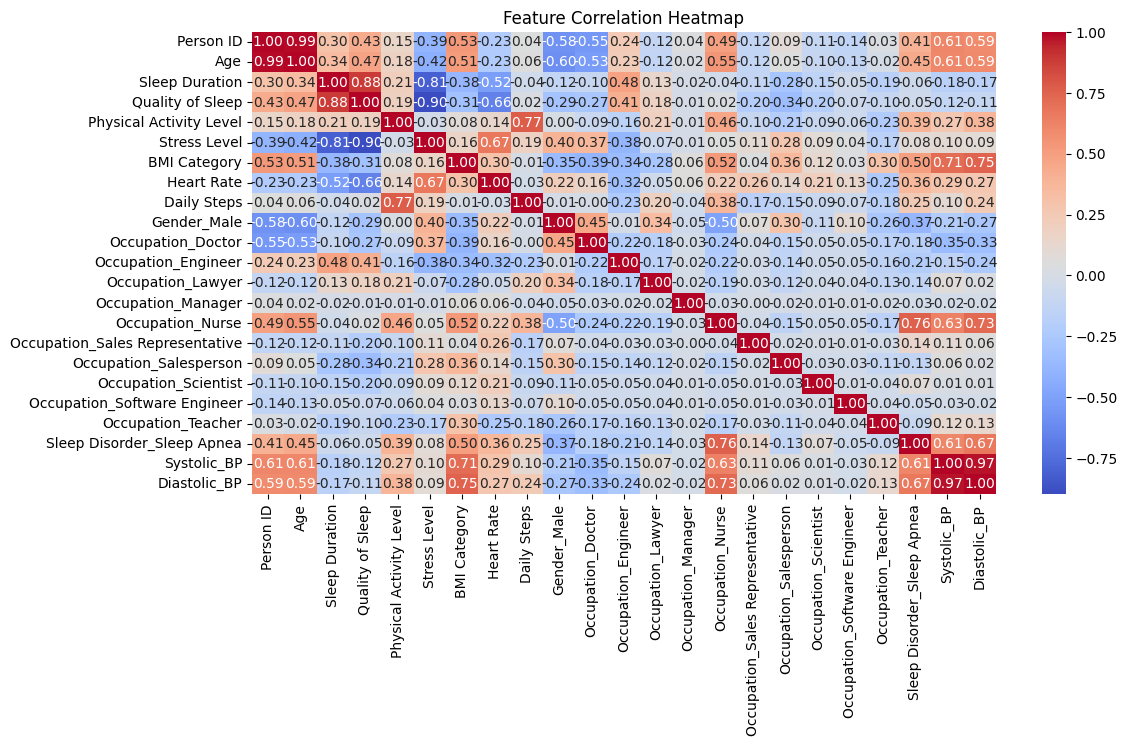

In [17]:
import seaborn as sns
import matplotlib.pyplot as plt

# Compute correlation matrix
corr_matrix = df.corr()

# Plot heatmap
plt.figure(figsize=(12, 6))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Feature Correlation Heatmap")
plt.show()



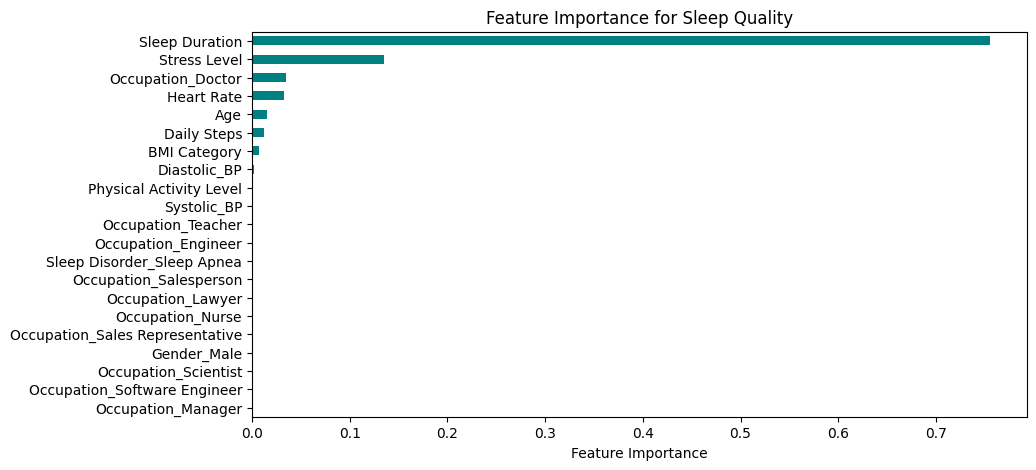

In [18]:
from sklearn.ensemble import RandomForestRegressor

# Define features (X) and target (y)
X = df.drop(columns=["Quality of Sleep", "Person ID"])  # Drop target and ID
y = df["Quality of Sleep"]

# Train a Random Forest model
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X, y)

# Get feature importance
feature_importance = pd.Series(model.feature_importances_, index=X.columns)

# Plot feature importance
plt.figure(figsize=(10, 5))
feature_importance.sort_values().plot(kind="barh", color="teal")
plt.xlabel("Feature Importance")
plt.title("Feature Importance for Sleep Quality")
plt.show()


Splitting Data into Train and Test Sets

In [19]:
from sklearn.model_selection import train_test_split

# Define features and target
X = df.drop(columns=["Quality of Sleep"])  # Independent variables
y = df["Quality of Sleep"]  # Target variable

# Split dataset into training (80%) and testing (20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Training set size:", X_train.shape)
print("Testing set size:", X_test.shape)


Training set size: (299, 22)
Testing set size: (75, 22)


Baseline Model

In [20]:
from sklearn.ensemble import RandomForestRegressor

# Initialize the model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)

# Train the model
rf_model.fit(X_train, y_train)

print("Random Forest Model Trained!")


Random Forest Model Trained!


In [21]:
from sklearn.metrics import mean_absolute_error, r2_score

# Make predictions
y_pred = rf_model.predict(X_test)

# Evaluate performance
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"R² Score: {r2:.2f}")


Mean Absolute Error (MAE): 0.05
R² Score: 0.98


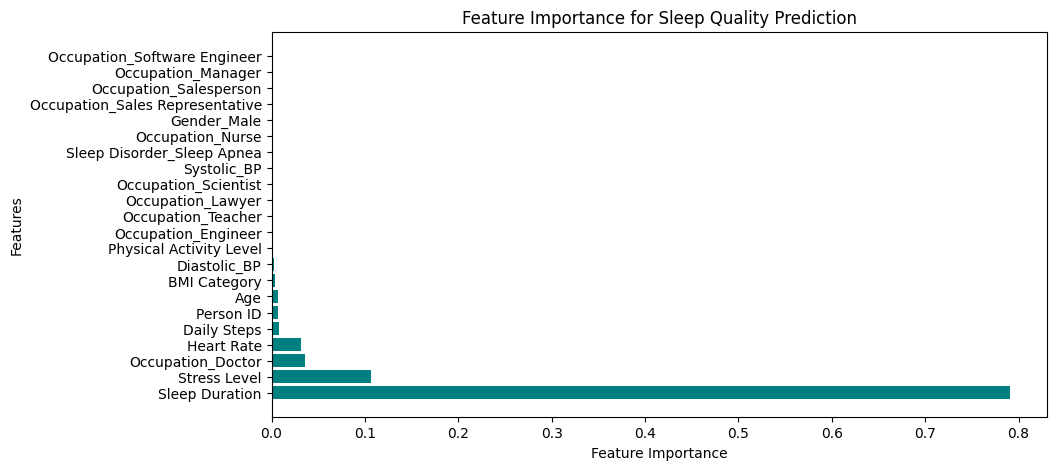

In [22]:
import matplotlib.pyplot as plt
import numpy as np

# Get feature importances
importances = rf_model.feature_importances_
feature_names = X.columns

# Sort feature importance
indices = np.argsort(importances)[::-1]

# Plot feature importance
plt.figure(figsize=(10, 5))
plt.barh(feature_names[indices], importances[indices], color="teal")
plt.xlabel("Feature Importance")
plt.ylabel("Features")
plt.title("Feature Importance for Sleep Quality Prediction")
plt.show()


In [23]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor

# Define the parameter grid
param_grid = {
    "n_estimators": [50, 100, 200],       # Number of trees
    "max_depth": [None, 10, 20, 30],       # Tree depth
    "min_samples_split": [2, 5, 10],       # Min samples to split
    "min_samples_leaf": [1, 2, 4]          # Min samples per leaf
}

# Initialize Random Forest model
rf = RandomForestRegressor(random_state=42)

# Initialize Grid Search
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, 
                           cv=5, n_jobs=-1, verbose=2, scoring='r2')

# Fit Grid Search
grid_search.fit(X_train, y_train)

# Get the best parameters
print("Best Parameters:", grid_search.best_params_)


Fitting 5 folds for each of 108 candidates, totalling 540 fits
Best Parameters: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}


In [24]:
# Train model with best parameters
best_rf = RandomForestRegressor(**grid_search.best_params_, random_state=42)
best_rf.fit(X_train, y_train)

# Make predictions
y_pred_best = best_rf.predict(X_test)


In [25]:
from sklearn.metrics import mean_absolute_error, r2_score

# Evaluate model
mae_best = mean_absolute_error(y_test, y_pred_best)
r2_best = r2_score(y_test, y_pred_best)

print(f"Optimized Mean Absolute Error: {mae_best:.2f}")
print(f"Optimized R² Score: {r2_best:.2f}")


Optimized Mean Absolute Error: 0.05
Optimized R² Score: 0.98


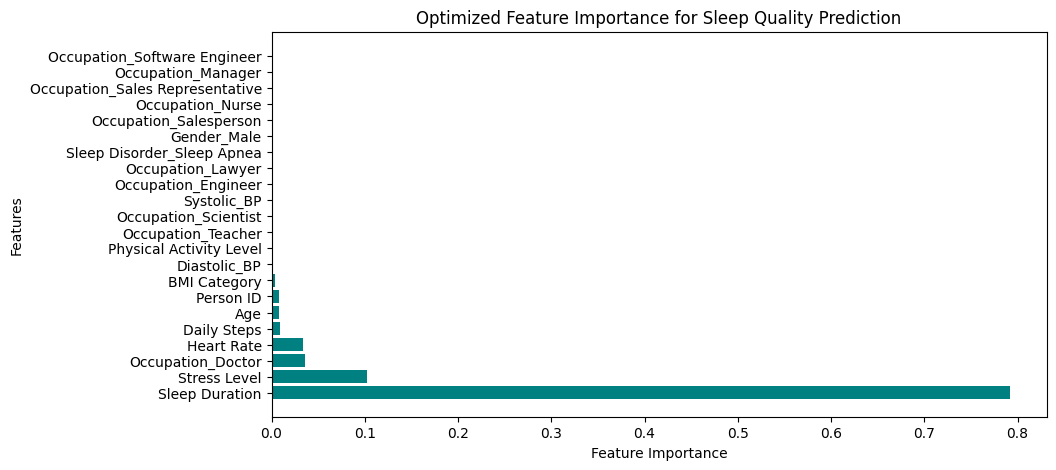

In [26]:
import matplotlib.pyplot as plt
import numpy as np

# Get feature importances
importances = best_rf.feature_importances_
feature_names = X.columns

# Sort feature importance
indices = np.argsort(importances)[::-1]

# Plot feature importance
plt.figure(figsize=(10, 5))
plt.barh(feature_names[indices], importances[indices], color="teal")
plt.xlabel("Feature Importance")
plt.ylabel("Features")
plt.title("Optimized Feature Importance for Sleep Quality Prediction")
plt.show()


Comparing Models

In [28]:
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.ensemble import GradientBoostingRegressor
from xgboost import XGBRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_absolute_error, r2_score

models = {
    "Linear Regression": LinearRegression(),
    "SVM": SVR(),
    "Gradient Boosting": GradientBoostingRegressor(),
    "XGBoost": XGBRegressor(),
    "Neural Network": MLPRegressor(hidden_layer_sizes=(100, 50), max_iter=500)
}

results = {}

for name, model in models.items():
    model.fit(X_train, y_train)  # Train the model
    y_pred = model.predict(X_test)  # Predict on test data
    
    # Evaluate
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    
    results[name] = {"MAE": mae, "R² Score": r2}

# Print results
for model, scores in results.items():
    print(f"{model}: MAE={scores['MAE']:.2f}, R²={scores['R² Score']:.2f}")


Linear Regression: MAE=0.12, R²=0.97
SVM: MAE=0.75, R²=0.40
Gradient Boosting: MAE=0.03, R²=0.99
XGBoost: MAE=0.02, R²=1.00
Neural Network: MAE=0.21, R²=0.94


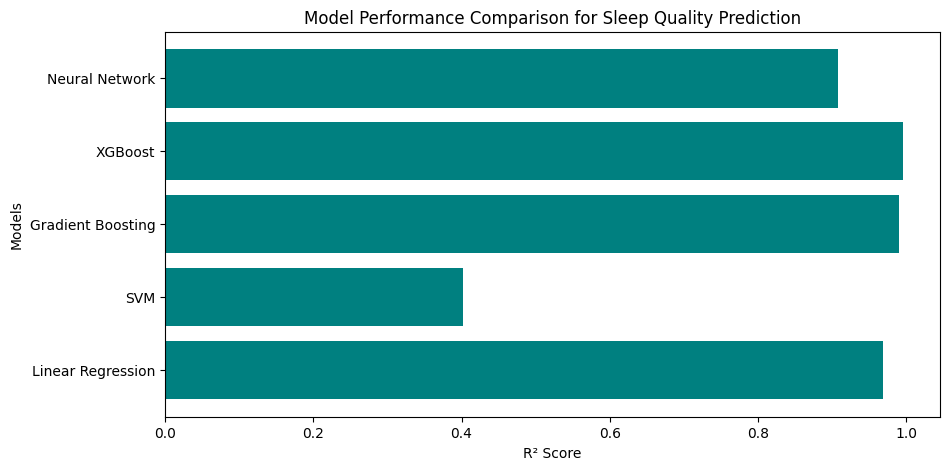

In [ ]:
import matplotlib.pyplot as plt

# Extract model names and R² scores
model_names = list(results.keys())
r2_scores = [results[m]["R² Score"] for m in model_names]

# Plot bar chart
plt.figure(figsize=(10, 5))
plt.barh(model_names, r2_scores, color="teal")
plt.xlabel("R² Score")
plt.ylabel("Models")
plt.title("Model Performance Comparison for Sleep Quality Prediction")
plt.show()


Hyperparameter tuning

In [ ]:
import numpy as np
import xgboost as xgb
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import mean_squared_error

# Define the model
xgb_model = xgb.XGBRegressor(objective='reg:squarederror', random_state=42)

# Define hyperparameter grid
xgb_param_grid = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.05, 0.1, 0.3],
    'max_depth': [3, 5, 7, 10],
    'subsample': [0.5, 0.7, 1.0],
    'colsample_bytree': [0.5, 0.7, 1.0]
}

# Perform Randomized Search
xgb_random_search = RandomizedSearchCV(
    estimator=xgb_model, 
    param_distributions=xgb_param_grid,
    n_iter=20, 
    scoring='r2', 
    cv=5, 
    verbose=2, 
    random_state=42, 
    n_jobs=-1
)

# Fit on training data
xgb_random_search.fit(X_train, y_train)

# Get the best model
best_xgb = xgb_random_search.best_estimator_
print("Best XGBoost Parameters:", xgb_random_search.best_params_)

# Evaluate performance
y_pred = best_xgb.predict(X_test)
print("XGBoost R² Score:", best_xgb.score(X_test, y_test))
print("XGBoost RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))


Fitting 5 folds for each of 20 candidates, totalling 100 fits
Best XGBoost Parameters: {'subsample': 0.7, 'n_estimators': 50, 'max_depth': 10, 'learning_rate': 0.3, 'colsample_bytree': 0.7}
XGBoost R² Score: 0.9940915703773499
XGBoost RMSE: 0.09441158685212307


In [ ]:
from sklearn.ensemble import GradientBoostingRegressor

# Define the model
gbm = GradientBoostingRegressor(random_state=42)

# Define hyperparameter grid
gbm_param_grid = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.05, 0.1, 0.3],
    'max_depth': [3, 5, 7],
    'subsample': [0.5, 0.7, 1.0]
}

# Perform Grid Search
gbm_random_search = RandomizedSearchCV(
    estimator=gbm,
    param_distributions=gbm_param_grid,
    n_iter=20,
    scoring='r2',
    cv=5,
    verbose=2,
    random_state=42,
    n_jobs=-1
)

# Fit on training data
gbm_random_search.fit(X_train, y_train)

# Get the best model
best_gbm = gbm_random_search.best_estimator_
print("Best Gradient Boosting Parameters:", gbm_random_search.best_params_)

# Evaluate performance
y_pred = best_gbm.predict(X_test)
print("Gradient Boosting R² Score:", best_gbm.score(X_test, y_test))
print("Gradient Boosting RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))


Fitting 5 folds for each of 20 candidates, totalling 100 fits
Best Gradient Boosting Parameters: {'subsample': 0.5, 'n_estimators': 200, 'max_depth': 5, 'learning_rate': 0.05}
Gradient Boosting R² Score: 0.9880248230082805
Gradient Boosting RMSE: 0.1344098884931919
